In [97]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [8]:
competitions = pd.read_json(r'open-data-master/data/competitions.json')

In [18]:
concat_matchs = []
for i in competitions[competitions.competition_id == 11].season_id.to_list():
    matchs = pd.read_json(f'open-data-master/data/matches/11/{i}.json')
    concat_matchs.append(matchs)
    
matchs_messi = pd.concat(concat_matchs)

4
1
2
27
26
25
24
23
22
21
41
40
39
38
37


In [27]:
list_event = matchs_messi.match_id.to_list()

In [78]:
event_messi_goal = []
for event in list_event:
    events = pd.read_json(f'open-data-master/data/events/{event}.json')
    events = events.dropna(subset=['player'])
    events = events.dropna(subset=['type'])
    events = events.reset_index(drop=True)
    for ids in range(len(events)):
        events.loc[ids, 'messi'] = events.loc[ids, 'player']['id']
        events.loc[ids, 'messishot'] = events.loc[ids, 'type']['name']
        
    events = events[(events['messi'] == 5503) & (events['messishot'] == 'Shot') ]

    event_messi_goal.append(events)

matchs_messi_event = pd.concat(event_messi_goal)

In [80]:
matchs_messi_event.to_pickle('messishoot')

In [95]:
matchs_messi_event = matchs_messi_event.reset_index(drop = True)
for shot in range(len(matchs_messi_event)):
    matchs_messi_event.loc[shot, 'x'] = matchs_messi_event.loc[shot, 'shot']['end_location'][1]
    if len(matchs_messi_event.loc[shot, 'shot']['end_location']) == 3:
        matchs_messi_event.loc[shot,'y'] = matchs_messi_event.loc[shot, 'shot']['end_location'][2]
    matchs_messi_event.loc[shot,'typeofshot'] = matchs_messi_event.loc[shot, 'shot']['type']['name']
    matchs_messi_event.loc[shot,'result'] = matchs_messi_event.loc[shot, 'shot']['outcome']['name']
    

In [96]:
matchs_messi_event

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,messishot,50_50,miscontrol,half_start,player_off,half_end,x,y,typeofshot,result
0,8c95e369-ec54-4a84-9d3e-51abb6f38e6e,835,1,2020-04-12 00:17:13.830,17,13,"{'id': 16, 'name': 'Shot'}",37,"{'id': 217, 'name': 'Barcelona'}","{'id': 3, 'name': 'From Free Kick'}",...,Shot,NaN,NaN,NaN,NaN,NaN,36.8,2.2,Free Kick,Goal
1,2ae506b9-0601-460b-b91d-802296120161,1174,1,2020-04-12 00:24:28.346,24,28,"{'id': 16, 'name': 'Shot'}",51,"{'id': 217, 'name': 'Barcelona'}","{'id': 3, 'name': 'From Free Kick'}",...,Shot,NaN,NaN,NaN,NaN,NaN,43.1,1.5,Free Kick,Saved
2,971e6343-d6c8-4f7c-bf5b-e4a5652c527e,2023,1,2020-04-12 00:46:05.056,46,5,"{'id': 16, 'name': 'Shot'}",95,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}",...,Shot,NaN,NaN,NaN,NaN,NaN,37.4,0.5,Open Play,Goal
3,e691649b-129e-4903-8d0f-6ffd81dbe19d,3720,2,2020-04-12 00:39:20.150,84,20,"{'id': 16, 'name': 'Shot'}",167,"{'id': 217, 'name': 'Barcelona'}","{'id': 2, 'name': 'From Corner'}",...,Shot,NaN,NaN,NaN,NaN,NaN,41.4,2.4,Open Play,Goal
4,9130568a-79df-4049-80c4-92481b24b457,3995,2,2020-04-12 00:47:47.247,92,47,"{'id': 16, 'name': 'Shot'}",181,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}",...,Shot,NaN,NaN,NaN,NaN,NaN,36.1,0.1,Open Play,Post
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,69f7edf8-090d-4fbd-ac5b-8afb9daa2756,2973,2,2020-04-12 00:41:49.793,86,49,"{'id': 16, 'name': 'Shot'}",192,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}",...,Shot,NaN,NaN,NaN,NaN,NaN,36.0,0.3,Open Play,Saved
1999,8e6ec37a-afb8-45e5-a751-c2fd8144e613,3060,2,2020-04-12 00:43:50.512,88,50,"{'id': 16, 'name': 'Shot'}",195,"{'id': 217, 'name': 'Barcelona'}","{'id': 3, 'name': 'From Free Kick'}",...,Shot,NaN,NaN,NaN,NaN,NaN,39.9,2.1,Open Play,Saved
2000,d6101d1f-dfd5-4fe1-b4a7-f33cb80d339f,2498,2,2020-04-12 00:22:44.202,67,44,"{'id': 16, 'name': 'Shot'}",161,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}",...,Shot,NaN,NaN,NaN,NaN,NaN,41.0,0.2,Open Play,Saved
2001,d3a1fae2-f6e3-4765-bbb2-b61df1f8fabe,2920,2,2020-04-12 00:34:53.548,79,53,"{'id': 16, 'name': 'Shot'}",188,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}",...,Shot,NaN,NaN,NaN,NaN,NaN,35.2,6.0,Open Play,Off T


In [108]:
xGoal = matchs_messi_event[(matchs_messi_event['result'] == "Goal") & (matchs_messi_event['typeofshot'] == 'Penalty')]['x'].to_list()
zGoal = matchs_messi_event[(matchs_messi_event['result'] == "Goal") & (matchs_messi_event['typeofshot'] == 'Penalty')]['y'].to_list()

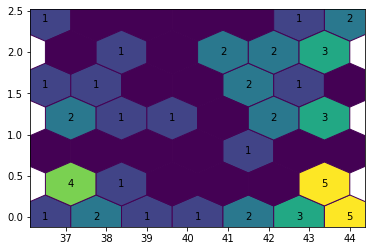

In [109]:

fGoal = plt.hexbin(xGoal,zGoal,C=None,gridsize=6,bins=None, zorder=2, cmap= "viridis", edgecolors='#440154ff')
countsGoal = fGoal.get_array()
positionsGoal = fGoal.get_offsets() 

for c, (x,y) in zip(countsGoal,positionsGoal):
    if c != 0.0:
        
        plt.text(x,y,"{:d}".format(int(c)), ha="center", va="center")

plt.show()

In [105]:
matchs_messi_event['typeofshot'].value_counts()

Open Play    1603
Free Kick     336
Penalty        64
Name: typeofshot, dtype: int64